In [61]:
# Gaussian Discriminant Analysis:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=2,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

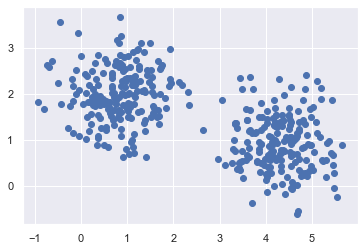

In [63]:
plt.scatter(X[:, 0], X[:, 1])

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_true, test_size=0.25, random_state=0)

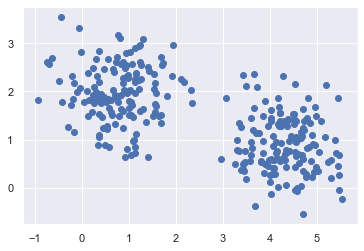

In [65]:
plt.scatter(x_train[:, 0], x_train[:, 1])

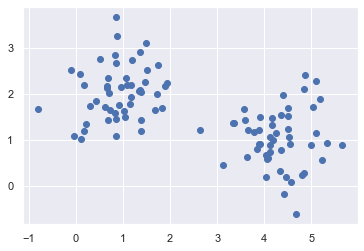

In [66]:
plt.scatter(x_test[:, 0], x_test[:, 1])

In [139]:
class GaussianDiscriminantAnalysis():
    def __init__(self):
        self.k     = None
        self.mu    = None
        self.Covar = None
        self.Probability = None
    def training(self,data_x,data_y):
        
        self.k = sum(data_y)/data_y.size
        
        self.mu = np.zeros([data_x.shape[1],2]) 
        
        self.mu[0] = sum(np.array([data_y]).T*data_x)/sum(data_y)
        self.mu[1] = sum((-(np.array([data_y]).T - 1))*x_train)/(data_y.size-sum(data_y))
        
        S1 = np.matmul(np.array(data_x - mu[0]).T,data_x - mu[0])
        S2 = np.matmul(np.array(data_x - mu[1]).T,data_x - mu[1])
        
        self.Covar = sum(data_y)*S1/data_y.size + (data_y.size-sum(data_y))*S2/data_y.size
              
    def fit(self,x):          
        self.Probability = np.zeros([x.shape[0],2])
        for i in range(x.shape[0]):
            self.Probability[i,0] = self.k*np.exp( np.matmul(np.matmul(x[i]-self.mu[0],np.linalg.inv(self.Covar)),(x[i]-self.mu[0]).T) )       
            self.Probability[i,1] = self.k*np.exp( np.matmul(np.matmul(x[i]-self.mu[1],np.linalg.inv(self.Covar)),(x[i]-self.mu[1]).T) )       
    
    def predict(self):      
        results = np.argmax(self.Probability, axis=1)     
        return results

In [140]:
mymodel = GaussianDiscriminantAnalysis()
mymodel.training(x_train,y_train)

In [141]:
mymodel.fit(x_test)
results = mymodel.predict()

In [142]:
results

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [143]:
y_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1])